# Modeling a moving average (MA) process
* Defining a moving average process 
* Using the `autocorrelation function (ACF)` to identify the order of a moving average process 
* Forecasting a time series using the moving average model

In a random walk process, we know a series whose first difference is stationary with no autocorrelation i.e. plotting its `ACF` will show no significant coefficients after lag 
0. However, it is possible that a stationary process still exhibits autocorrelation. In this case, we have a time series that can be approximated by a `moving average (MA)` model MA(q), an `autoregressive (AR)` model AR(p), or an `autoregressive moving average (ARMA)` model ARMA(p,q).

## Defining a MA process
A MA process, or the MA model, states that the current value is linearly dependent on the current and past error terms. The error terms are assumed to be mutually independent and normally distributed, just like white noise.

A MA model is denoted as MA(q) where q is the order. The model expresses the present value as a linear combination of the mean of the series μ, the present error term 
$ϵ_t$, and past error terms $ϵ_t−q$. The magnitude of the impact of past errors on the present value is quantified using a coefficient denoted as $θ_q$.

$y_t = μ + ϵ_t + θ_1 ϵ_{t−1} + θ_2 ϵ_{t−2} + ⋅⋅⋅ + θ_q ϵ_{t−q}$

The order q of the moving average model determines the number of past error terms that affect the present value. For example, if it is of order one, meaning that we have a MA(1) process, then the model is expressed as follows:

$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1}$

Hence, we can see how the order q of the MA(q) process affects the number of past error terms that must be included in the model. The larger q is, the more past error terms affect the present value. **Therefore, it is important to determine the order of the moving average process in order to fit the appropriate model**, meaning that if we have a second-order moving average process, then a second-order moving average model will be used for forecasting.

## Identifying the order of a MA process
![Steps to identify an MA(q) model and its order](https://miro.medium.com/max/586/1%2AUxNs4UUR251MlA85aT4hMg.png)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('widget_sales.csv')
df.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


In [10]:
df.shape

(500, 1)

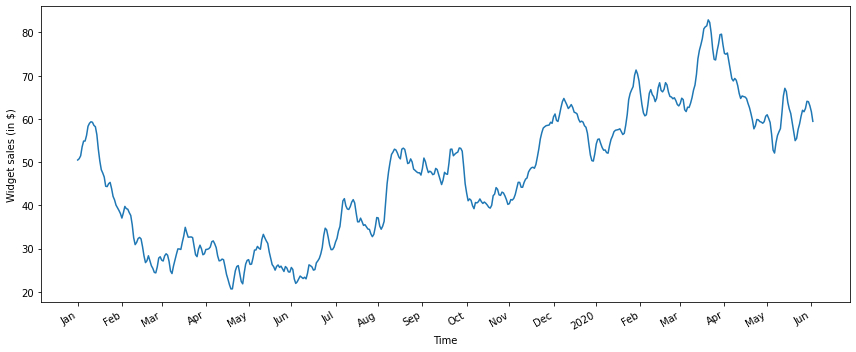

In [3]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.widget_sales)   
ax.set_xlabel('Time')      
ax.set_ylabel('Widget sales (in $)')
plt.xticks([0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout() 

In [4]:
## Test for stationarity
from statsmodels.tsa.stattools import adfuller 

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0])) # Retrieve the ADF statistic
    print('p - value: {}'.format(result[1]))      # Retrieve the p-value
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    return result

DF_result = adf_test(df.widget_sales) 

ADF Statistics: -1.5121662069359048
p - value: 0.5274845352272605
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [5]:
## Apply transformation - First difference
widget_sales_diff = np.diff(df.widget_sales, n=1) 
DF_result         = adf_test(widget_sales_diff) 

## Now series is STATIONARY

ADF Statistics: -10.576657780341947
p - value: 7.0769228185877515e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


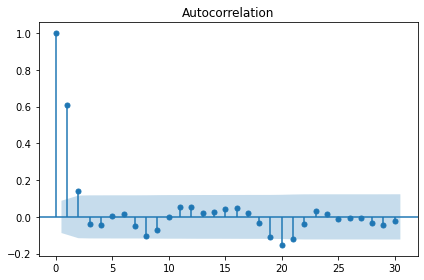

In [6]:
from statsmodels.graphics.tsaplots import plot_acf 

plot_acf(widget_sales_diff, lags=30)
plt.tight_layout()

## Notice how coefficients are significant up until lag 2 before falling abruptly in the non-significance zone (shaded area) of the plot.
## We see some significant coefficients around lag 20, but this is likely due to chance since they are non-significant between lag 3 and 20 and after lag 20.

## Forecasting a MA model
In this case, working with the volume of widget sales, we discovered that the stationary process is a second-order (q = 2) MA process since the ACF plot showed significant coefficients up until lag 2. We can also try for q = 20 if  MA(q = 2) does not give satisfactory results.

When using a MA(q) model, forecasting beyond q steps into the future will simply return the `mean`, because there are no error terms to estimate beyond q steps. Therefore, we can do rolling forecasts to predict up to q steps at a time in order avoid predicting only the mean of the series.

We will try two naïve forecasting techniques and fit a second-order MA model. The `naïve forecast` will serve as baseline to evaluate the performance of the moving average model.

In [7]:
df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})
train   = df_diff[:int(0.9*len(df_diff))]
test    = df_diff[int(0.9*len(df_diff)):]
print(len(train))
print(len(test))
## forecast 50 timesteps into the future.

449
50


In [19]:
test

,widget_sales_diff
449,-1.170131
450,0.580967
451,-0.144902
452,-0.096564
453,-0.372334
454,-1.118891
455,-0.979693
456,-1.369431
457,-1.517477
458,-2.006735


In [11]:
df_diff.shape

(499, 1)

* The MA(q) model does not allow us to forecast 50 steps into future in one shot.
* The MA model is linearly dependent on past error terms. Those terms are not observed in the dataset and must therefore be recursively estimated.
* This means that for an MA(q) model, we can only forecast q steps into the future.
* Any prediction made beyond that point will not have past error terms and the model will only predict the mean.
* Therefore, there is no added value in forecasting beyond q steps into the future because the predictions will fall flat, as only the mean is returned, which is equivalent to a baseline model.


In order to avoid simply predicting the mean beyond two timesteps into the future, we need to develop a function that will predict two timesteps or less at a time until 50 
predictions are made, such that we can compare our predictions against the observed values of the test set. This method is called `rolling` forecasts.

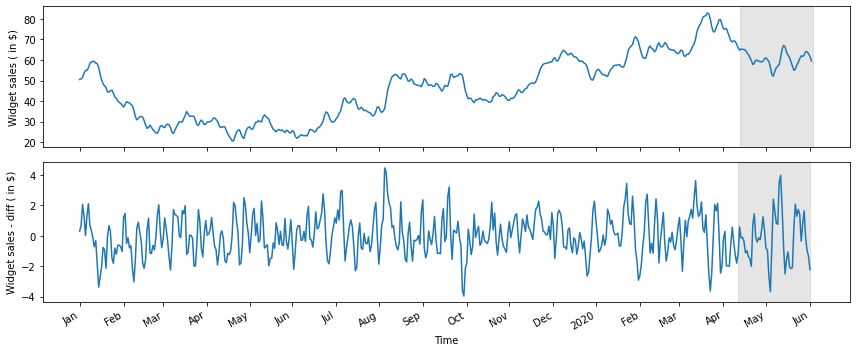

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,5))
ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales ( in $)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)

ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff ( in $)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)
plt.xticks([0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun']) 
fig.autofmt_xdate() 
plt.tight_layout()
plt.show()

First, we will import the `SARIMAX` function from the `statsmodels` library. This function will allow us to fit a `MA(2)` model to our differenced series. Note that `SARIMAX` is a complex model that allows us to consider seasonal effects, autoregressive processes, non-stationary time series, MA processes, and exogenous variables all in one single model.

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    '''
    The function takes in a DataFrame containing the full simulated MA process. We also pass in the length of the training set (train_len=500 in our case) and 
    the horizon of forecast (horizon=50 in our case). The next parameter specifies how many steps at time we wish to forecast (window=2 in our case).
    Finally, we specify the method to use to make forecasts. 
    '''
    total_len = train_len + horizon 
 
    if method == 'mean': ## forecasts coming from the historical mean
        pred_mean = [] 
 
        for i in range(train_len, total_len, window): 
            mean = np.mean(df[:i].values) 
            pred_mean.extend(mean for _ in range(window)) 
        return pred_mean 
    
    elif method == 'last': ## forecasts coming from the last observed value
        pred_last_value = [] 
 
        for i in range(train_len, total_len, window): 
            last_value = df[:i].iloc[-1].values[0] 
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value 
 
    elif method == 'MA': ## forecasts coming from the MA(2), predicting beyond two steps
        pred_MA = [] 
 
        for i in range(train_len, total_len, window): 
            model       = SARIMAX(df[:i], order=(0,0,2)) ## p, w, q
            res         = model.fit(disp=False) 
            predictions = res.get_prediction(0, i + window - 1) 
            oos_pred    = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred) 
    return pred_MA

In [15]:
pred_df         = test.copy()
TRAIN_LEN       = len(train) # 499
HORIZON         = len(test)  # 50
WINDOW          = 2
pred_mean       = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA         = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')
pred_df['pred_mean']       = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA']         = pred_MA
pred_df.head()

,widget_sales_diff,pred_mean,pred_last_value,pred_MA
449,-1.170131,0.034319,-1.803658,-1.078833
450,0.580967,0.034319,-1.803658,-0.273309
451,-0.144902,0.032861,0.580967,0.781223
452,-0.096564,0.032861,0.580967,0.234969
453,-0.372334,0.032183,-0.096564,0.168994


In [21]:
pred_df.shape

(50, 4)

<AxesSubplot:>

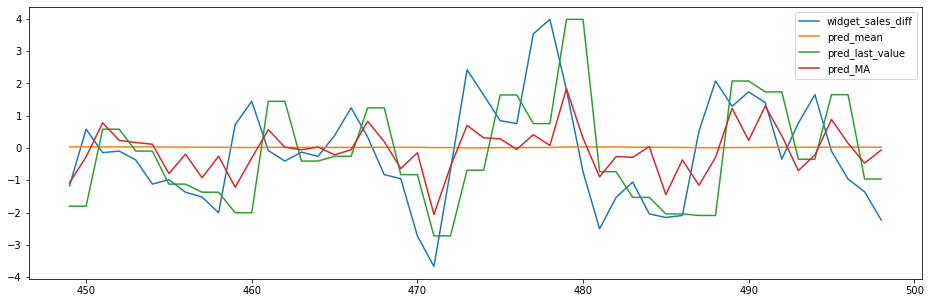

In [24]:
pred_df['Actual'] = test.copy()
pred_df[['widget_sales_diff', 'pred_mean', 'pred_last_value', 'pred_MA']].plot(figsize=(16,5))


prediction coming from the historical `mean` is almost a straight line. This is expected since the `process is stationary` and should be stable over time.

In [36]:
from sklearn.metrics import mean_squared_error 

mse_mean = mean_squared_error(pred_df.widget_sales_diff, pred_df.pred_mean) 
mse_last = mean_squared_error(pred_df.widget_sales_diff, pred_df.pred_last_value)
mse_MA   = mean_squared_error(pred_df.widget_sales_diff, pred_df.pred_MA)
print(mse_mean, mse_last, mse_MA)

2.5606299456880555 3.2494260812249225 1.948171449763134


In [38]:
df

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
495,64.087371
496,63.992081
497,63.029894
498,61.671797


**Now that we have our good model on the stationary series, we need to `undifference` our predictions to bring them back to the original scale of the `untransformed` dataset.**

In [39]:
## Undifference the predictions to bring them back to the original scale of the dataset.

df['pred_widget_sales']       = pd.Series()
df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum() ## cumulative sum
df

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


,widget_sales,pred_widget_sales
0,50.496714,NaN
1,50.805493,NaN
2,51.477758,NaN
3,53.542228,NaN
4,54.873108,NaN
...,...,...
495,64.087371,60.335201
496,63.992081,61.218392
497,63.029894,61.365771
498,61.671797,60.895973


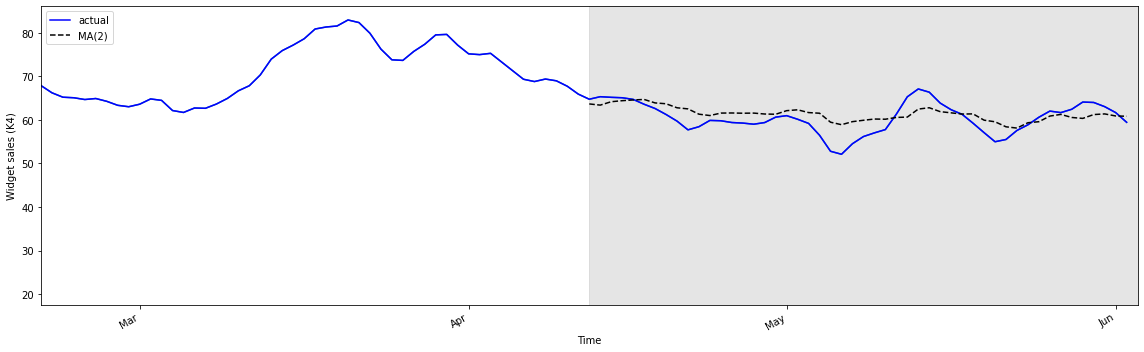

In [40]:
## Let’s visualize our untransformed predictions against the recorded data.

fig, ax = plt.subplots(figsize=(16,5)) 
ax.plot(df.widget_sales) 
ax.plot(df.widget_sales, 'b-', label='actual') #A 
ax.plot(df.pred_widget_sales, 'k--', label='MA(2)') #B 
ax.legend(loc=2) 
ax.set_xlabel('Time') 
ax.set_ylabel('Widget sales (K4)') 
ax.axvspan(450, 500, color='#808080', alpha=0.2) 
ax.set_xlim(400, 500) 
plt.xticks([409, 439, 468, 498], ['Mar', 'Apr', 'May', 'Jun']) 
fig.autofmt_xdate() 
plt.tight_layout() 
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error 

mae_MA_undiff = mean_absolute_error(df.widget_sales[450:], df.pred_widget_sales[450:]) 
print(mae_MA_undiff) 

2.324470924392925
